In [55]:
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import plotly.express as px
import math

<h3>QUESTION 1: Read in the gapminder_clean.csv as a pandas DataFrame.</h3>

In [56]:
# turns the csv into a DataFrame
df = pd.read_csv('gapminder_clean.csv')

<h3>QUESTION 2: Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.</h3>

In [39]:
# df.loc[] accesses a particular cell
# np.where() returns elements based on a certain condition
df1962 = df.loc[np.where((df['Year']==1962))]

<function matplotlib.pyplot.show(close=None, block=None)>

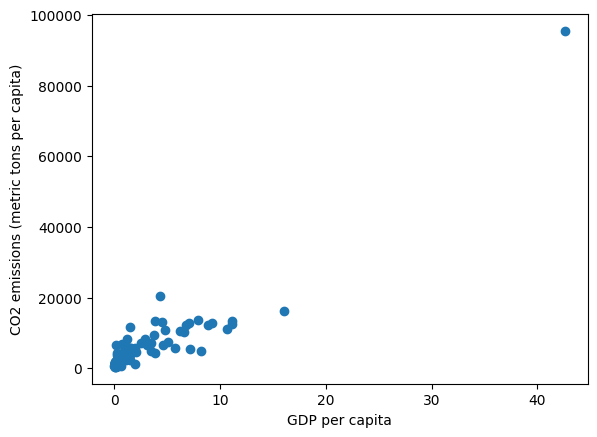

In [53]:
co2 = df1962['CO2 emissions (metric tons per capita)']
gdp = df1962['gdpPercap']

plt.scatter(co2, gdp)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('GDP per capita')
plt.title('')
plt.show

<h3>QUESTION 3: On the filtered data, calculate the pearson correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the Pearson R value and associated p value?</h3>

In [60]:
# Pearson R value = coefficient that measures linear correlation between two sets of data.
# Pearson p value = probability that of the current result if the correlation coefficient = zero — assesses whether a correlation is real 
stats = pg.corr(co2, gdp)
# pg.corr returns a DataFrame with r and p-val as two of the indexes
r = stats['r']
p = stats['p-val']
print(f"R value: {r} \n")
print(f"p value: {p}")

R value: pearson    0.926082
Name: r, dtype: float64 

p value: pearson    1.128679e-46
Name: p-val, dtype: float64


<h3>QUESTION 4: On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step.</h3>